## Joseph Rochelle
## DSC 550 Data Mining
## Orgional Case Study 2

In [40]:
import pandas as pd
from matplotlib import __version__ as mpv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import numpy as np


**Link to data:** https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv

**Problem Statement:**

We live in a world where there are apps for everything. As a great idea emerges, a developer simply uploads the apps to Apple and Google stores for users to receive for free or to pay for service. Investors need predictive frameworks to predict high ratings and downloads, which can assist with determining if the app should be free, free with advertisements, or a paid service. By creating a predictive model, investors can access the mode of which the app should be uploaded to yield the strongest return on investment as the app is intended to scale. 


**Proposal of solutions:** 

By using the `google play store` data set, I will create three regression models: (a) un-regularized linear regression, (b) regularized linear regression, and (c) random forest regression. I will utilizes these three models in a cross-validated pipeline, by judging their performance on a data set by mean squared errors. After determining the best model, I will evaluate my final model (trained on the previous three training sets) to demonstrate an objective mdoel that should generalize well in the future. 

Using the paramaters found, I will train a final model using all the data and explore the most approriate strategy: If one of the regression models, the magniture of the coefficents will be examined; if it is the Random Forest regression model, the feature importance will be used. 

In [68]:
df= pd.read_csv("googleplaystore.csv")
df.head(5)

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

## Data Cleaning & EDA

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [44]:
df.shape

(10841, 13)

In [72]:
#Dropping Nulls to have equal parts per column
df.dropna(inplace= True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


**Functions to for data cleaning:** The purpose of this section is to focus on data cleaning the variables. These variables will transform to bianary classifications and the formats of sizing updated. In addiiton to the sizing, we will drop the #N/A and duplicates within this section as well as code shown above. 

In [74]:
# Cleaning Categories into integers
CategoryString = df["Category"]
categoryVal = df["Category"].unique()
categoryValCount = len(categoryVal)
category_dict = {}
for i in range(0,categoryValCount):
    category_dict[categoryVal[i]] = i
df["Category_c"] = df["Category"].map(category_dict).astype(int)

In [75]:
#scaling and cleaning size of installation
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which had NA
df.Size.fillna(method = 'ffill', inplace = True)

In [76]:
#Cleaning no of installs classification
df['Installs'] = [int(i[:-1].replace(',','')) for i in df['Installs']]

In [77]:
#Converting Type classification into binary
#Used types.unique() to look at the data. 
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)

In [78]:
#Cleaning of content rating classification
RatingL = df['Content Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content Rating'] = df['Content Rating'].map(RatingDict).astype(int)

In [79]:
#Dropped columns that have no value
df.drop(labels = ['Last Updated','Current Ver','Android Ver','App'], axis = 1, inplace = True)

In [80]:
#Cleaning of genres
GenresL = df.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
df['Genres_c'] = df['Genres'].map(GenresDict).astype(int)

In [81]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

In [82]:
# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int32  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   int64  
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   int32  
 8   Genres          9360 non-null   object 
 9   Category_c      9360 non-null   int32  
 10  Genres_c        9360 non-null   int32  
dtypes: float64(3), int32(4), int64(2), object(2)
memory usage: 731.2+ KB


In [84]:
df.head(4)

Category  Rating  Reviews        Size  Installs  Type  Price  \
0  ART_AND_DESIGN     4.1      159  19000000.0     10000     0    0.0   
1  ART_AND_DESIGN     3.9      967  14000000.0    500000     0    0.0   
2  ART_AND_DESIGN     4.7    87510   8700000.0   5000000     0    0.0   
3  ART_AND_DESIGN     4.5   215644  25000000.0  50000000     0    0.0   

   Content Rating                     Genres  Category_c  Genres_c  
0               0               Art & Design           0         0  
1               0  Art & Design;Pretend Play           0         1  
2               0               Art & Design           0         0  
3               1               Art & Design           0         0

In [85]:
# for dummy variable encoding for Categories
df2 = pd.get_dummies(df, columns=['Category'])

In [87]:
df2.head(4)

Rating  Reviews        Size  Installs  Type  Price  Content Rating  \
0     4.1      159  19000000.0     10000     0    0.0               0   
1     3.9      967  14000000.0    500000     0    0.0               0   
2     4.7    87510   8700000.0   5000000     0    0.0               0   
3     4.5   215644  25000000.0  50000000     0    0.0               1   

                      Genres  Category_c  Genres_c  ...  \
0               Art & Design           0         0  ...   
1  Art & Design;Pretend Play           0         1  ...   
2               Art & Design           0         0  ...   
3               Art & Design           0         0  ...   

   Category_PERSONALIZATION  Category_PHOTOGRAPHY  Category_PRODUCTIVITY  \
0                         0                     0                      0   
1                         0                     0                      0   
2                         0                     0                      0   
3                         0                     0                      0   

   Category_SHOPPING  Category_SOCIAL  Category_SPORTS  Category_TOOLS  \
0                  0                0                0               0   
1                  0                0                0               0   
2                  0                0                0               0   
3                  0                0                0               0   

   Category_TRAVEL_AND_LOCAL  Category_VIDEO_PLAYERS  Category_WEATHER  
0                          0                       0                 0  
1                          0                       0                 0  
2                          0                       0                 0  
3                          0                       0                 0  

[4 rows x 43 columns]

**Please Note:** 
I ran `df['Size'].unique()`  to validate that the sizing was updated correctly.  10472 converted from words to numbers and/or removed. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

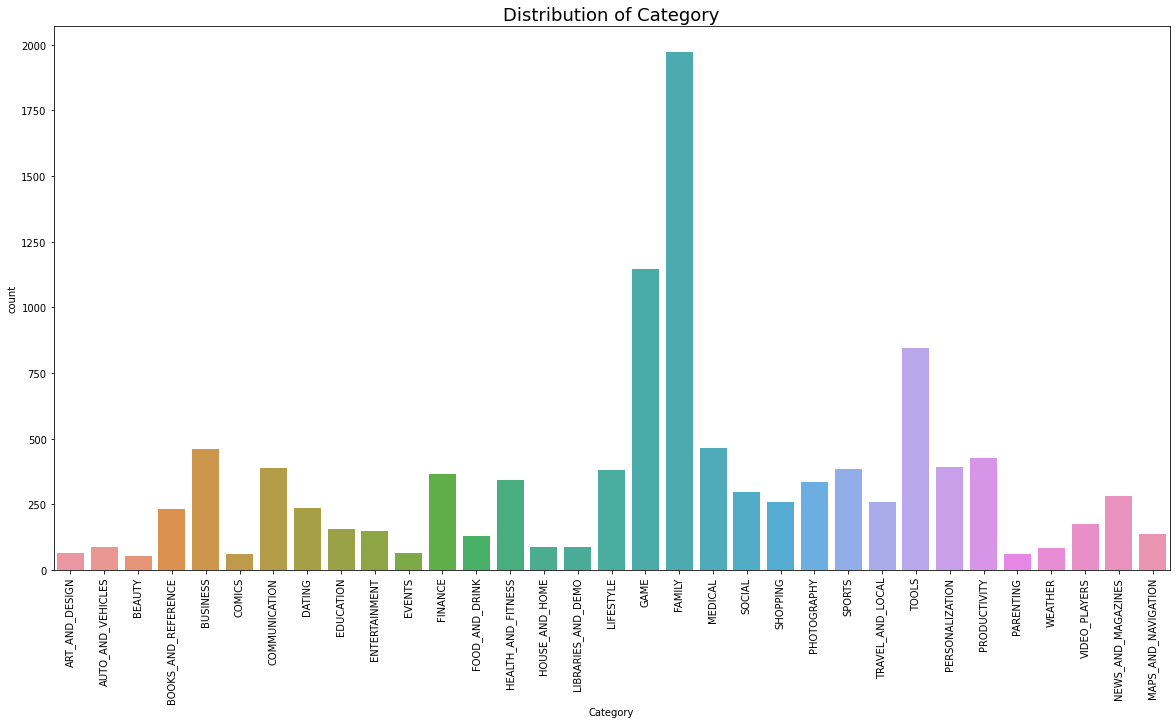

In [66]:
plt.figure(figsize=(20,10))
sns.countplot(x='Category',data=df)
plt.title("Distribution of Category", size=18)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

<Figure size 3600x1440 with 0 Axes>

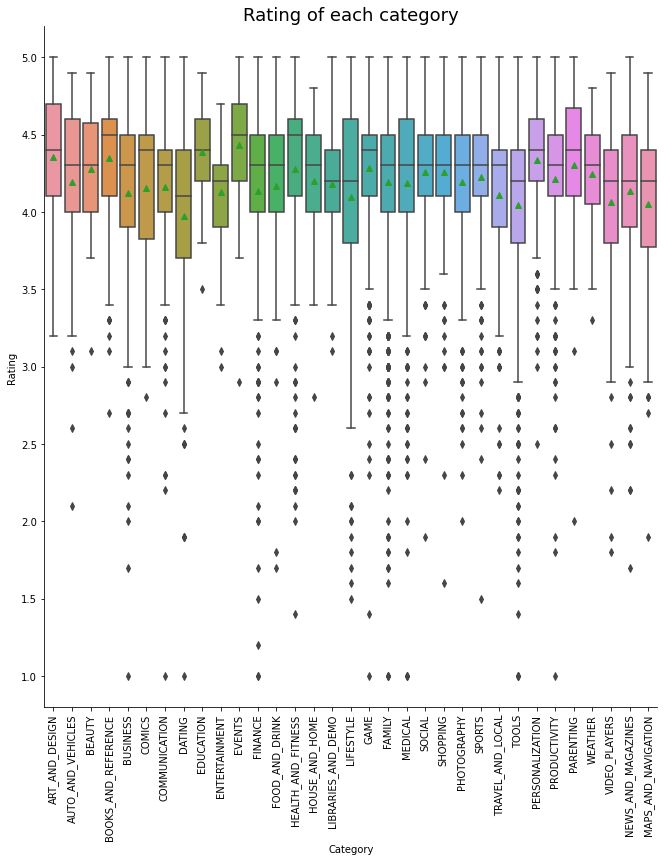

In [35]:
plt.figure(figsize=(50,20))
sns.catplot(x='Category',y='Rating',data=df,kind='box',height=10,showmeans=True)
plt.title("Rating of each category", size=18)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Content Rating', ylabel='Category'>

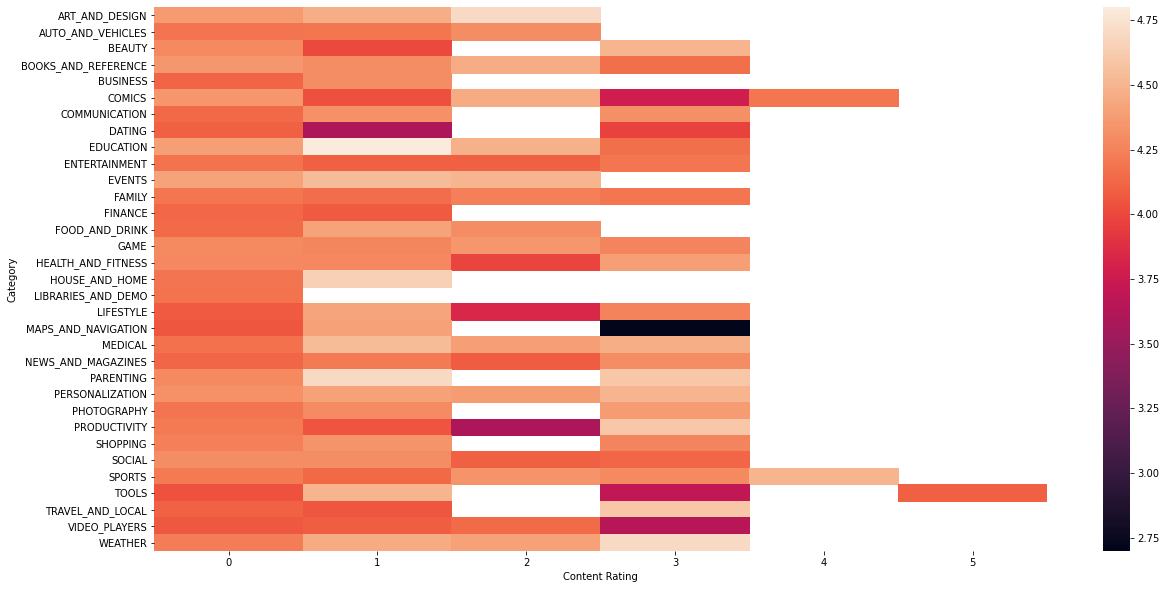

In [92]:
cat_con_rate = df.pivot_table(values='Rating',index='Category',columns='Content Rating')
plt.figure(figsize=(20,10))
sns.heatmap(cat_con_rate)

**Pandas Profiling:** 

For this section, I utilized Panda's profilling which was a very fast and clean way to visualize EDA. It is important to note that I have done this one time on the main data that will need to be examined 3 additional times with the training data set.  For the purposes of this case study, I am keeping the current visualizations with the intent of deciding which hold the most value for the final.  This researcher is a fan of the Pandas Profiling to summarize the data quickly. 

In [114]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

**Discussion:**
Now that i have completed preprocessing and some EDA, I will focus on creating a pipeline that will be usd to cross validate the information.  The next goal is to evaluate the 


**Feature Selection using SelectFrom Model:** https://scikit-learn.org/stable/modules/feature_selection.html

**Links to future coding:** 
https://realpython.com/linear-regression-in-python/

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://www.geeksforgeeks.org/random-forest-regression-in-python/

In [95]:
## Utilizing a correlation matrix to explore feature dimensionality and reduction as one technique. Anything above a 0.8 is highly correlated. 
#After reviewing, i am satisfied with the results. Please note that Category_c and Genre_c was transformed so naturally will show some higher correlations when converted to binary
# Pandas profilling was a faster and easier way to look at the correlation matrix for this weeks assignment. 
df.corr()

Rating   Reviews      Size  Installs      Type     Price  \
Rating          1.000000  0.068133  0.083154  0.051337  0.039592 -0.021919   
Reviews         0.068133  1.000000  0.149901  0.641605 -0.043244 -0.009824   
Size            0.083154  0.149901  1.000000  0.078248 -0.030452 -0.024785   
Installs        0.051337  0.641605  0.078248  1.000000 -0.053049 -0.011895   
Type            0.039592 -0.043244 -0.030452 -0.053049  1.000000  0.223344   
Price          -0.021919 -0.009824 -0.024785 -0.011895  0.223344  1.000000   
Content Rating  0.000862  0.060929  0.159105  0.028478 -0.034392 -0.016139   
Category_c     -0.026545 -0.013501 -0.040875  0.007837  0.049092 -0.014875   
Genres_c       -0.027970 -0.004510 -0.095311  0.025649  0.061286 -0.023562   

                Content Rating  Category_c  Genres_c  
Rating                0.000862   -0.026545 -0.027970  
Reviews               0.060929   -0.013501 -0.004510  
Size                  0.159105   -0.040875 -0.095311  
Installs              0.028478    0.007837  0.025649  
Type                 -0.034392    0.049092  0.061286  
Price                -0.016139   -0.014875 -0.023562  
Content Rating        1.000000   -0.094025 -0.094956  
Category_c           -0.094025    1.000000  0.844521  
Genres_c             -0.094956    0.844521  1.000000

**Recursive Feature Elimination & Cross-Validation:** The purpose of recursive feature elimination is to examine the weights of the featres. First, the estimator is trained to look at the set of features and obtain the coef_ attributes that look at the feature importance. Then, the least important features from the current set are removed.  the `REECV` is a cross-validation loop of the features. 

In [140]:
#Loading libries fro Recursive
import warnings
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn import datasets, linear_model


In [141]:
#Suppress warnings
warnings.filterwarnings(action="ignore", module="scipy",
                       message="^internal gelsd")

In [148]:
#Generate feature matrix, target vector, and true coefficients

features, target = make_regression (n_samples=9360,
                                   n_features =9,
                                   n_informative = 2)

In [149]:
#Create a linear regression 
ols =linear_model.LinearRegression()

In [150]:
#Recursively eliminate features
rfecv= RFECV(estimator= ols, step =1, scoring = "neg_mean_squared_error")
rfecv.fit(features, target)
rfecv.transform(features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([[-0.21058585, -2.13377445, -0.27755311,  2.18170681, -1.14491758],
       [ 1.04693406, -0.8759385 ,  0.56934987,  0.33518595, -0.35280115],
       [-1.00942913, -2.03423369,  2.34519292,  0.03873298,  0.84212032],
       ...,
       [ 1.24588005, -0.06894294,  0.75635701,  1.50233991, -0.3905977 ],
       [ 0.32309446,  1.5453575 ,  0.70073911,  2.93496475,  0.59008221],
       [-0.38038006, -0.14273824, -0.52285709,  0.36595403, -0.38425912]])

In [151]:
#Number of features we should keep
rfecv.n_features_

5

In [152]:
#Which categories are best
rfecv.support_

array([False, False,  True,  True, False,  True,  True,  True, False])

In [153]:
rfecv.ranking_

array([5, 4, 1, 1, 2, 1, 1, 1, 3])

**Discussion:** For this part of the case study, I've learned that recursive talls me how many features to keep or eliminate. I have 9 features and i believe it is telling me that 5 are exclusive. What i don't know is if this is done correctly. Is this an estimation based off the sampling frame?  The code that is presented appear to be an import of `features` and `target` so i believe i will need to feed these arrays into those objects and rop the import command.  I will examine these and focus on handling them for the next case study. 

It is important to note that the correlation matrix was judged to be fine from all features <0.8 in their associations. 
The feature elimination technique of recursive is a new learning and I'm working to understand how to load the objects to make a judgement here.